# 해양기상관측
데이터 링크 : https://data.kma.go.kr/data/sea/selectBuoyRltmList.do?pgmNo=52 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_rows',None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
cd /content/drive/MyDrive/일일 데이터 분석/

/content/drive/MyDrive/일일 데이터 분석


In [4]:
data = pd.read_csv('./해양기상관측.csv',encoding='cp949')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37867 entries, 0 to 37866
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지점           37867 non-null  int64  
 1   일시           37867 non-null  object 
 2   평균 풍속(m/s)   36951 non-null  float64
 3   평균기압(hPa)    37021 non-null  float64
 4   평균 상대습도(%)   36552 non-null  float64
 5   평균 기온(°C)    36961 non-null  float64
 6   평균 수온(°C)    37110 non-null  float64
 7   평균 최대 파고(m)  37281 non-null  float64
 8   평균 유의 파고(m)  37030 non-null  float64
 9   최고 유의 파고(m)  37780 non-null  float64
 10  최고 최대 파고(m)  37786 non-null  float64
 11  평균 파주기(sec)  36845 non-null  float64
 12  최고 파주기(sec)  37752 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 3.8+ MB


In [6]:
data.isnull().sum()

지점                0
일시                0
평균 풍속(m/s)      916
평균기압(hPa)       846
평균 상대습도(%)     1315
평균 기온(°C)       906
평균 수온(°C)       757
평균 최대 파고(m)     586
평균 유의 파고(m)     837
최고 유의 파고(m)      87
최고 최대 파고(m)      81
평균 파주기(sec)    1022
최고 파주기(sec)     115
dtype: int64

In [7]:
data.head()

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,21229,2018-01-01,9.50,1022.10,52.00,5.00,13.00,4.90,3.00,3.50,6.40,8.50,9.10
1,21229,2018-01-02,10.00,1022.70,47.00,5.90,13.00,4.70,2.80,4.00,6.60,8.40,9.10
2,21229,2018-01-03,6.50,1025.60,65.00,2.70,12.70,4.50,2.80,3.70,6.30,9.10,12.80
3,21229,2018-01-04,6.20,1024.40,63.00,3.50,12.50,4.20,2.60,3.70,5.80,9.80,10.70
4,21229,2018-01-05,3.60,1017.10,63.00,5.10,12.40,2.10,1.30,2.10,3.60,8.00,9.10


In [15]:
point = {22297 : '가거도(22297)',
         22193 : '가거도(22193)',
         22103 : '거문도',
         22104 : '거제도',
         22300 : '남해239',
         22301 : '남해465',
         22101 : '덕적도',
         22105 : '동해',
         22302 : '동해78',
         22107 : '마라도',
         22186 : '부안',
         22187 : '서귀포',
         22191 : '서해170',
         22299 : '서해190',
         22192 : '서해206',
         22183 : '신안', 
         22108 : '외연도',
         21229 : '울릉도',
         22189 : '울산',
         22190 : '울진',
         22185 : '인천',
         22184 : '추자도',
         22102 : '칠발도',
         22188 : '통영',
         22106 : '포항',
         22303 : '풍도',
         22298 : '홍도(22298)',
         22194 : '홍도(22194)',
         }

In [16]:
def preprocessing(dataframe):
  df = dataframe.copy()
  df['지점'] = df['지점'].map(lambda x: point[x])
  df['일시'] = df['일시'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
  df['년'] = df['일시'].map(lambda x: x.year)
  df['월'] = df['일시'].map(lambda x: x.month)
  df['일'] = df['일시'].map(lambda x: x.day)
  df['요일'] = df['일시'].map(lambda x: x.weekday())

  return df

sea_weather = preprocessing(data)

In [17]:
sea_weather.head()

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec),년,월,일,요일
0,울릉도,2018-01-01,9.50,1022.10,52.00,5.00,13.00,4.90,3.00,3.50,6.40,8.50,9.10,2018,1,1,0
1,울릉도,2018-01-02,10.00,1022.70,47.00,5.90,13.00,4.70,2.80,4.00,6.60,8.40,9.10,2018,1,2,1
2,울릉도,2018-01-03,6.50,1025.60,65.00,2.70,12.70,4.50,2.80,3.70,6.30,9.10,12.80,2018,1,3,2
3,울릉도,2018-01-04,6.20,1024.40,63.00,3.50,12.50,4.20,2.60,3.70,5.80,9.80,10.70,2018,1,4,3
4,울릉도,2018-01-05,3.60,1017.10,63.00,5.10,12.40,2.10,1.30,2.10,3.60,8.00,9.10,2018,1,5,4


In [22]:
point_latlon = {'거문도' : [34.00135,127.50127222],
           '거제도' : [34.7667,128.9],
           '덕적도' : [37.23611111,126.01875],
           '동해' : [37.48056,129.95],
           '마라도' : [33.0833,126.0333],
           '부안' : [35.3931,125.4850],
           '서귀포' : [33.0741,127.0122],
           '신안' : [34.73333333,126.24166667],
           '외연도' :[36.25,125.75],
           '울릉도' : [37.4554, 131.1144],
           '울산' : [35.2043, 129.5029],
           '울진' : [36.5425,129.5228],
           '인천' : [37.0530, 125.2544],
           '추자도' : [33.4737, 126.0828],
           '칠발도' : [34.7933,125.7769],
           '통영' : [34.2330, 128.1330],
           '포항' : [36.35,129.78333333],
           }


In [53]:
import folium as g

lat = []
lon = []
for p in point_latlon.values():
  a, b = p[0], p[1]
  lat.append(a)
  lon.append(b)

center_longitude, center_latitude = np.mean(lon), np.mean(lat)

g_map = g.Map(location=[center_latitude,center_longitude],
              tiles='Stamen Terrain',
              zoom_start=12)

for name, (lon, lat) in zip(list(point_latlon.keys()), list(point_latlon.values())):
    marker = g.Marker([lon,lat],
                      popup=[name],
                      icon= g.Icon(color='red')).add_to(g_map)

In [54]:
g_map

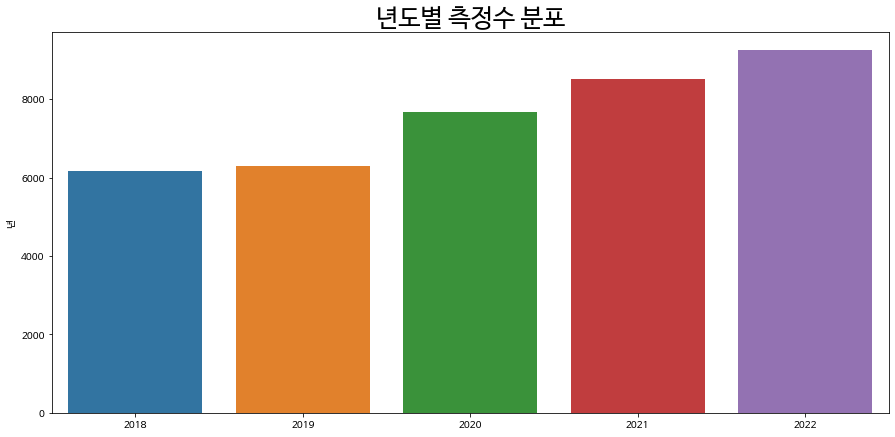

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x = sea_weather['년'].value_counts().index ,y = sea_weather['년'].value_counts())
plt.title('년도별 측정수 분포',size=25)
plt.show()

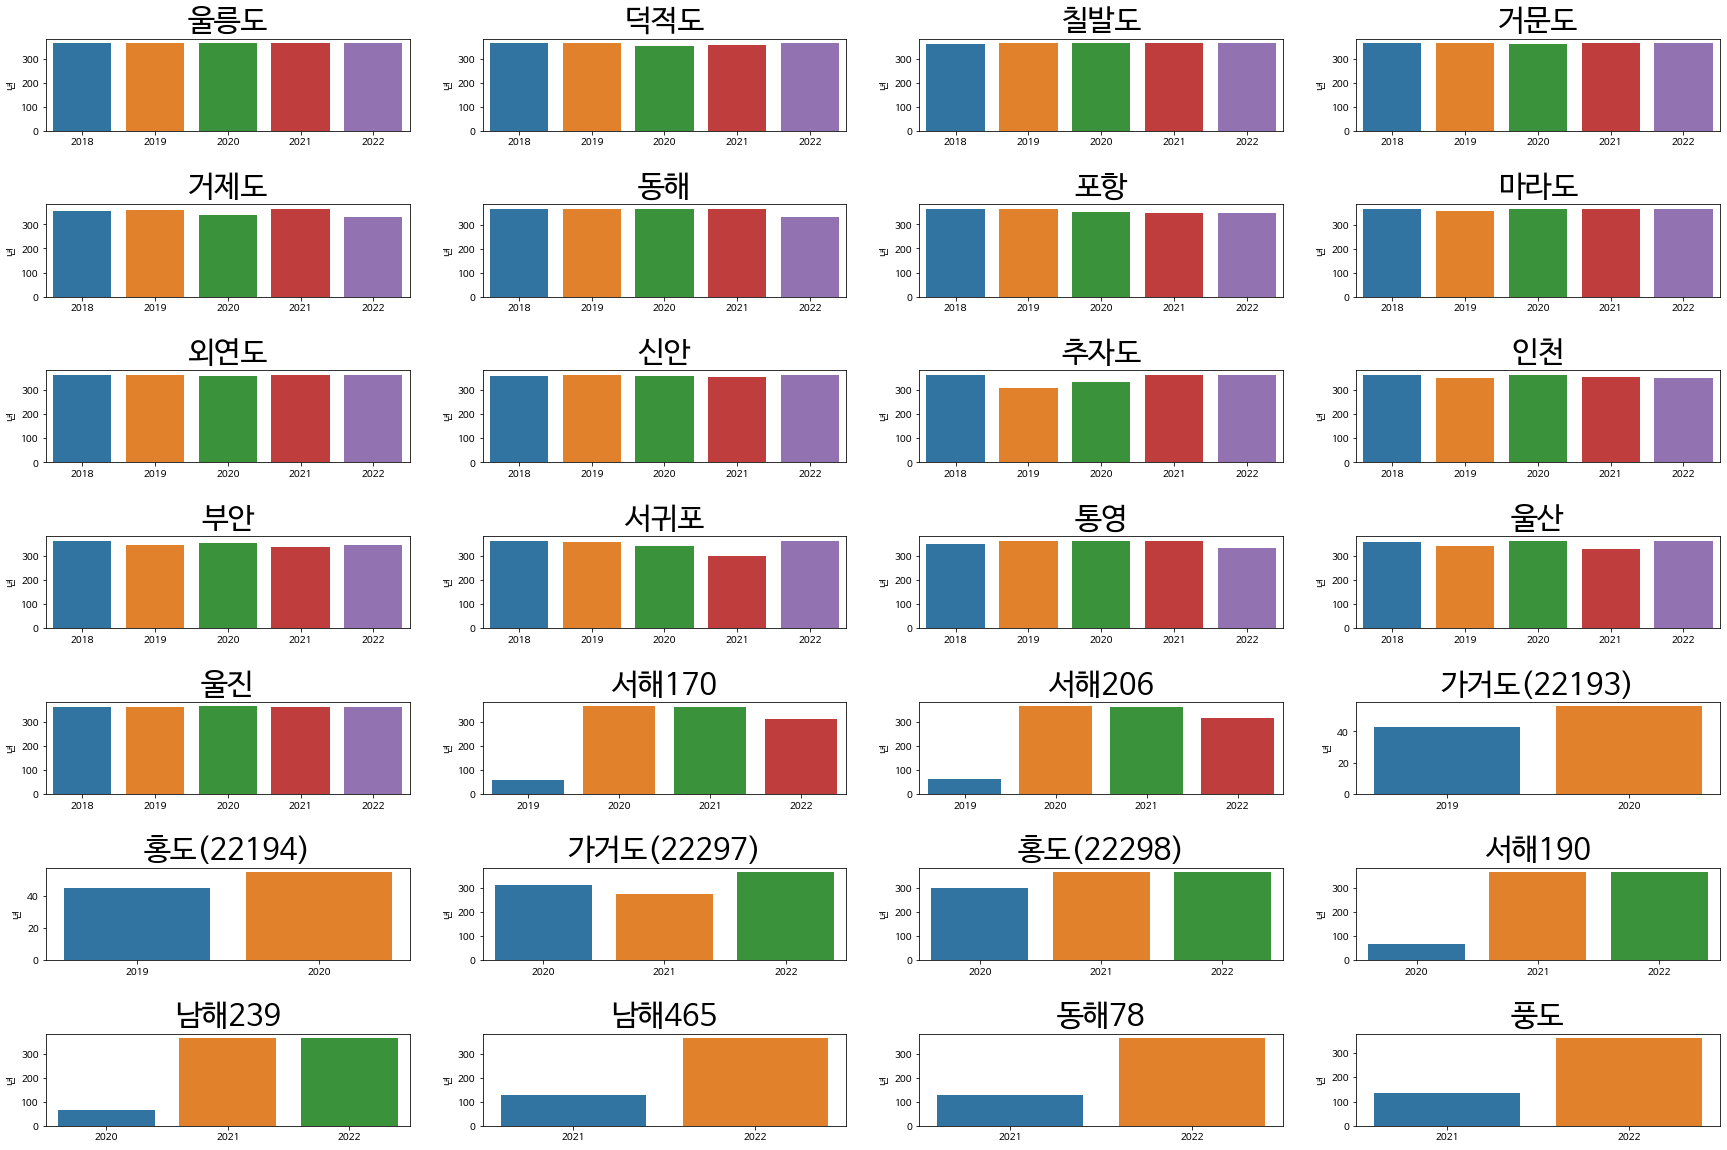

In [ ]:
plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=0.8)

for p in range(len(sea_weather['지점'].unique())):
  plot_df = sea_weather[sea_weather['지점'] == sea_weather['지점'].unique()[p]]

  plt.subplot(7,4,p+1)
  sns.barplot(x = plot_df['년'].value_counts().index ,y = plot_df['년'].value_counts())
  plt.title(sea_weather['지점'].unique()[p],size=30)
plt.show()

In [ ]:
# 년도별 분포
def year_plot(df):
  plot_df = df.groupby('년').mean()
  
  plt.figure(figsize=(30,10))
  plt.subplots_adjust(hspace=1)
    
  for idx in range(len(plot_df.columns[:-3])):
    plt.subplot(3,4,idx+1)
    sns.barplot(x=plot_df.index , y=plot_df.iloc[:,idx])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


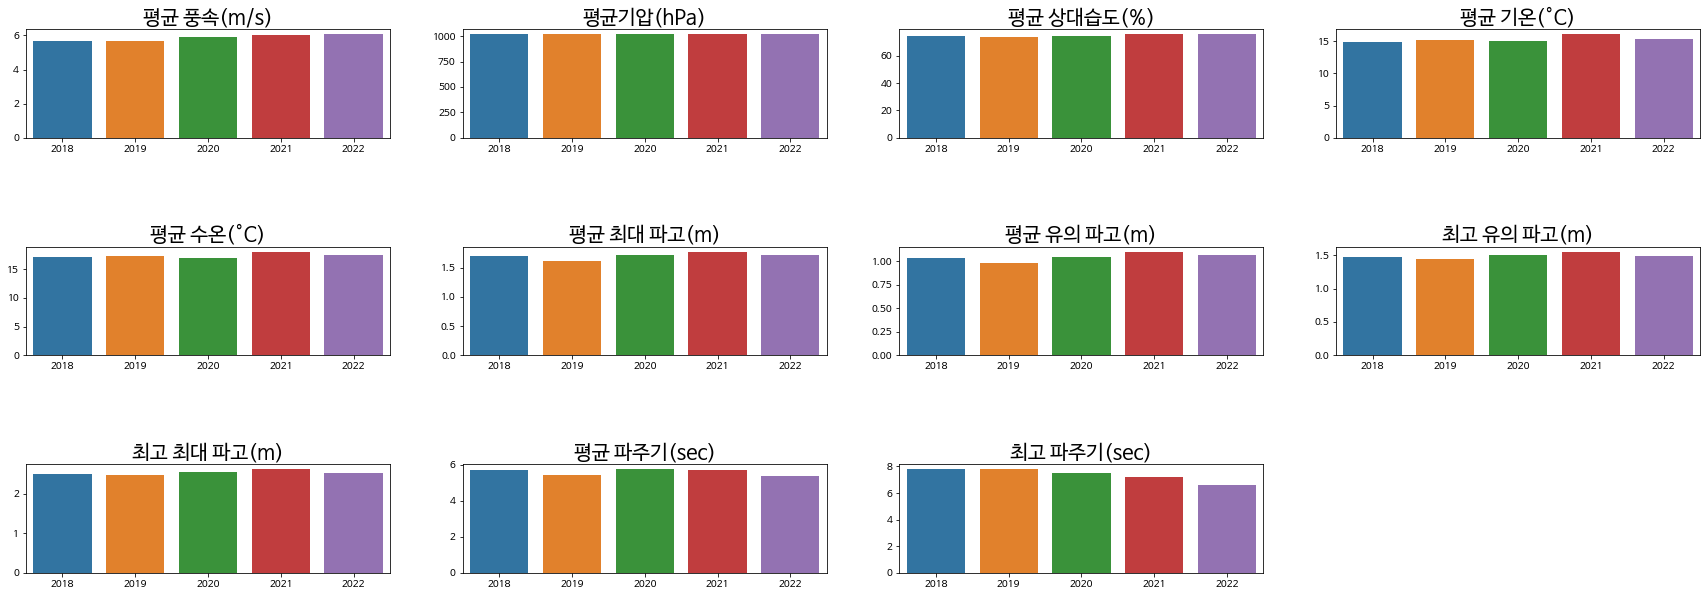

In [ ]:
year_plot(sea_weather)

In [ ]:
# 월
def month_plot(df):
  plot_df = df.groupby('월').mean()
  
  plt.figure(figsize=(30,10))
  plt.subplots_adjust(hspace=1)
    
  for idx in range(len(plot_df.columns[:-3])):
    plt.subplot(3,4,idx+1)
    sns.barplot(x=plot_df.index , y=plot_df.iloc[:,idx])
    plt.xlabel('')
    plt.ylabel('')
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


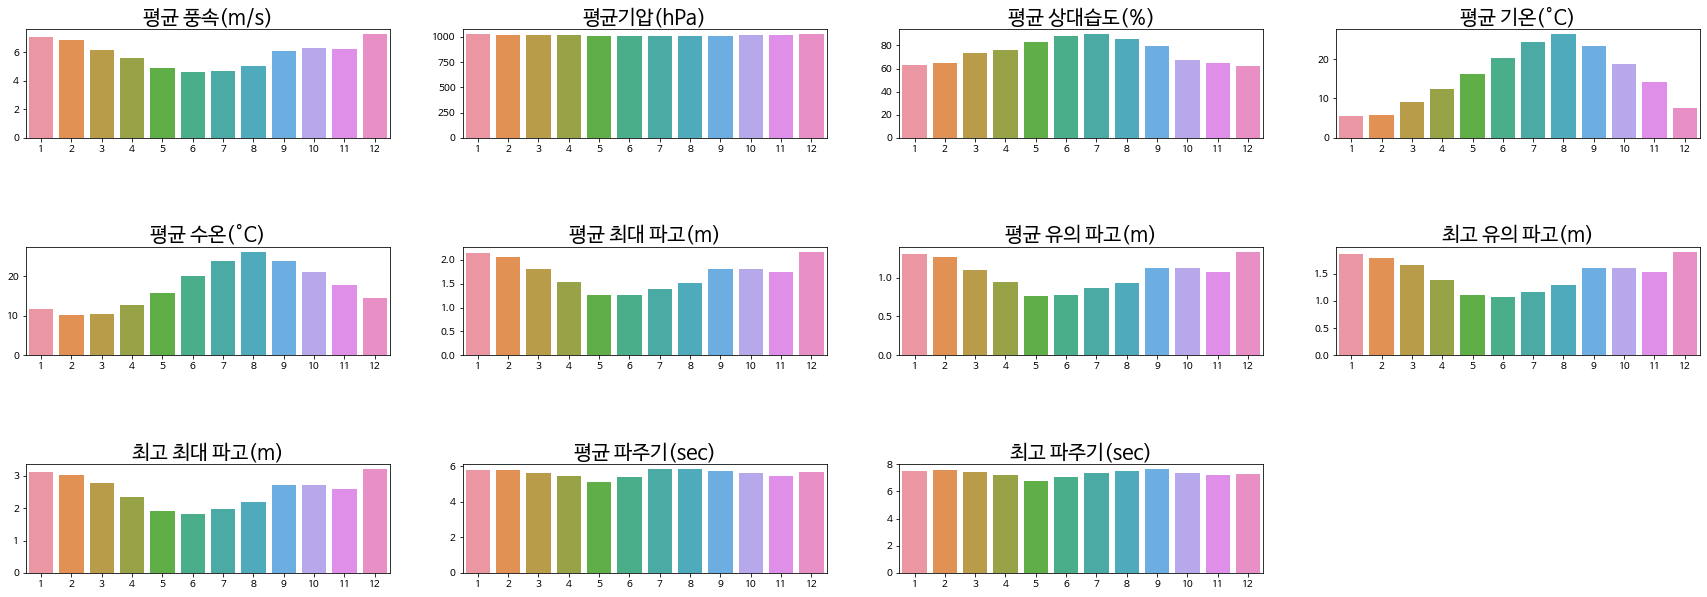

In [ ]:
month_plot(sea_weather)

In [ ]:
# 지점별 분포
def point_plot(df):
  plot_df = df.groupby('지점').mean()
  
  plt.figure(figsize=(30,10))
  plt.subplots_adjust(hspace=1)
    
  for idx in range(len(plot_df.columns[:-4])):
    plt.subplot(3,4,idx+1)
    sns.barplot(x=plot_df[plot_df.columns[idx]].sort_values()[::-1].index , y=plot_df[plot_df.columns[idx]].sort_values()[::-1])
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)
    plt.title(plot_df.columns[idx],size=20)
  plt.show()


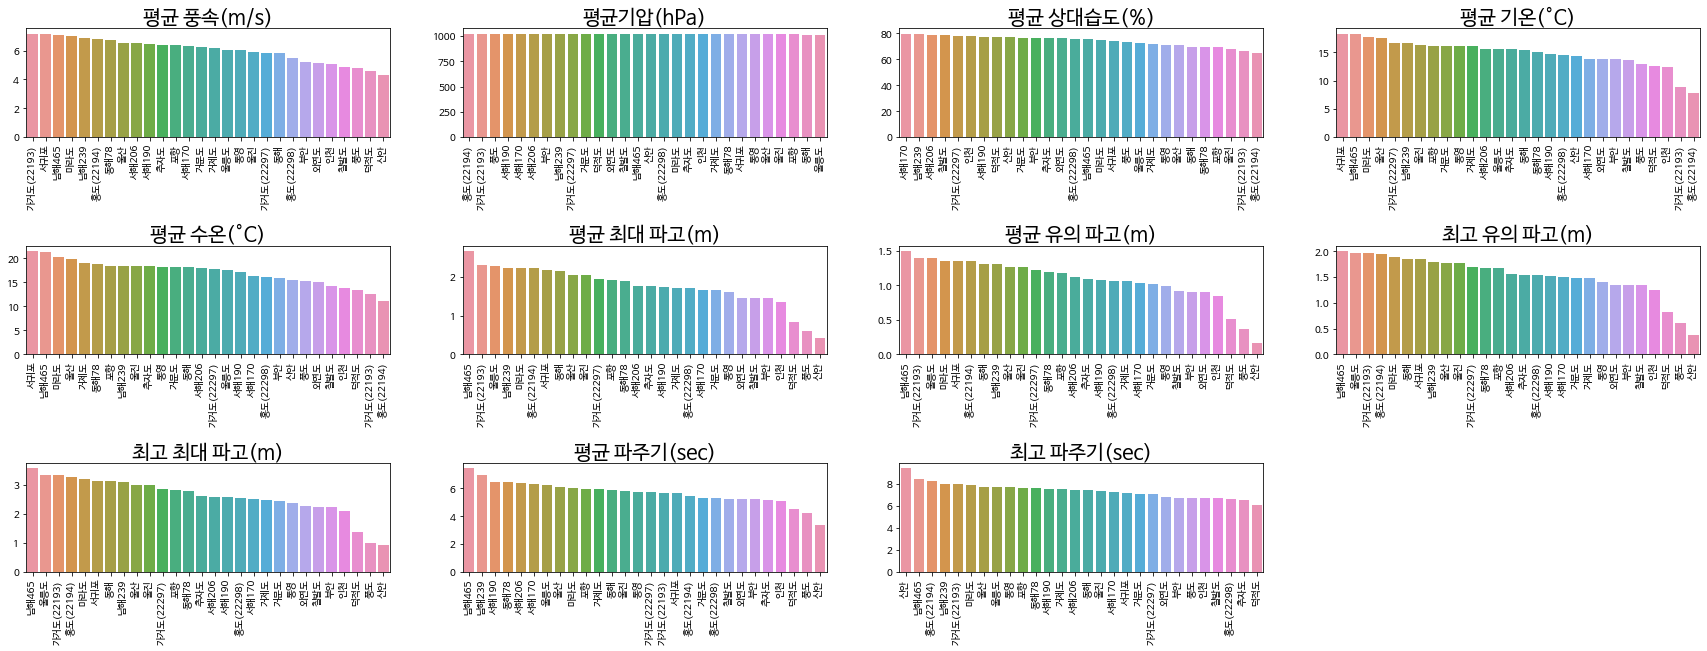

In [ ]:
point_plot(sea_weather)

In [ ]:
sea_weather.head()

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec),년,월,일,요일
0,울릉도,2018-01-01,9.50,1022.10,52.00,5.00,13.00,4.90,3.00,3.50,6.40,8.50,9.10,2018,1,1,0
1,울릉도,2018-01-02,10.00,1022.70,47.00,5.90,13.00,4.70,2.80,4.00,6.60,8.40,9.10,2018,1,2,1
2,울릉도,2018-01-03,6.50,1025.60,65.00,2.70,12.70,4.50,2.80,3.70,6.30,9.10,12.80,2018,1,3,2
3,울릉도,2018-01-04,6.20,1024.40,63.00,3.50,12.50,4.20,2.60,3.70,5.80,9.80,10.70,2018,1,4,3
4,울릉도,2018-01-05,3.60,1017.10,63.00,5.10,12.40,2.10,1.30,2.10,3.60,8.00,9.10,2018,1,5,4


In [ ]:
# 년도별 컬럼별 분포
year_list = list(range(2018,2023))
def make_plot(df):
  for col in df.columns[2:-4]:
    plt.figure(figsize=(30,10))
    plt.subplots_adjust(hspace=0.5)

    for idx in range(len(year_list)):
      plot_df = df[df['년'] == year_list[idx]]
      plt.subplot(1,5,idx+1)
      sns.barplot(x=plot_df['월'] , y=plot_df[col])
      # sns.barplot(x = plot_df['월'] , y = plot_df.loc[:,col])
      plt.xlabel('')
      plt.ylabel('')
      plt.title(year_list[idx],size=15)
      plt.suptitle(col,size=20)
    plt.show()

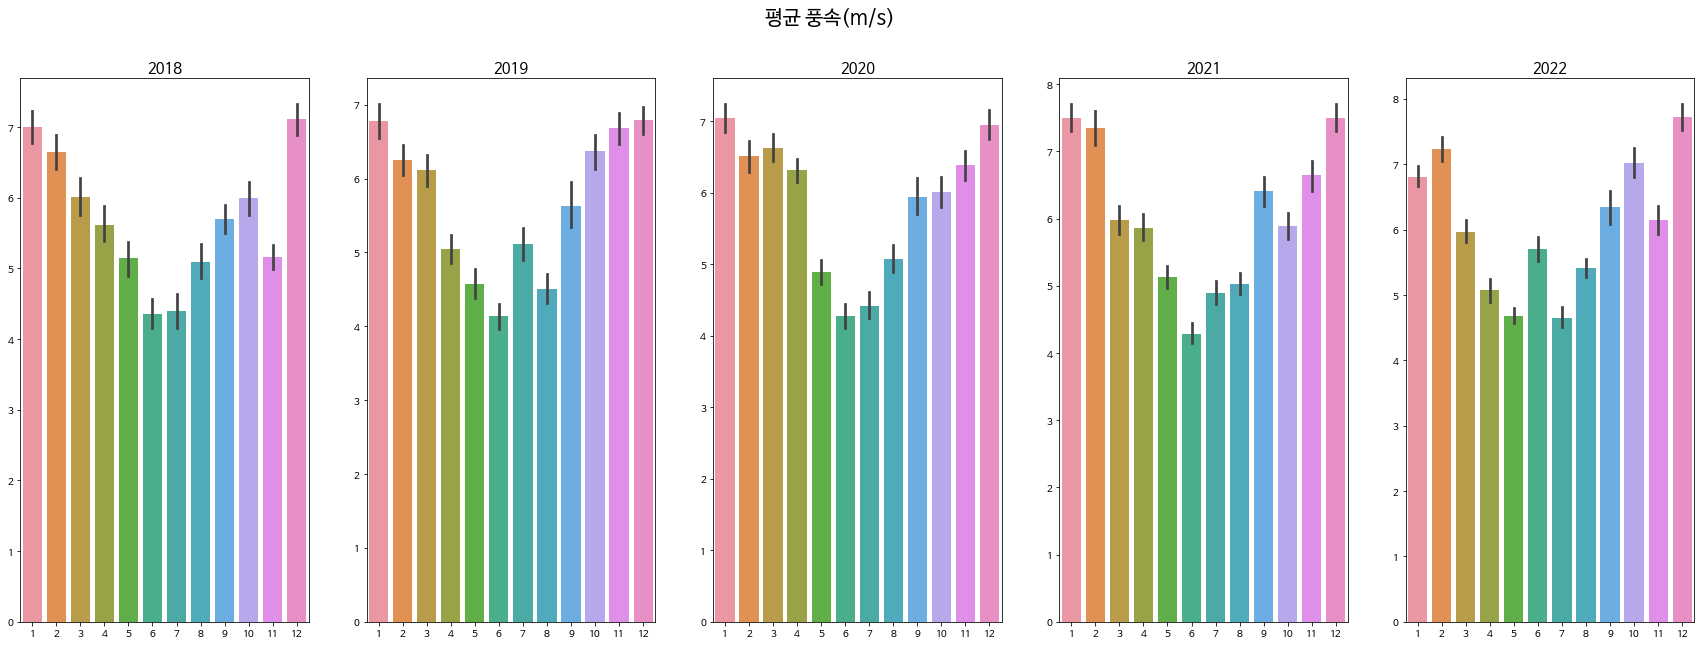

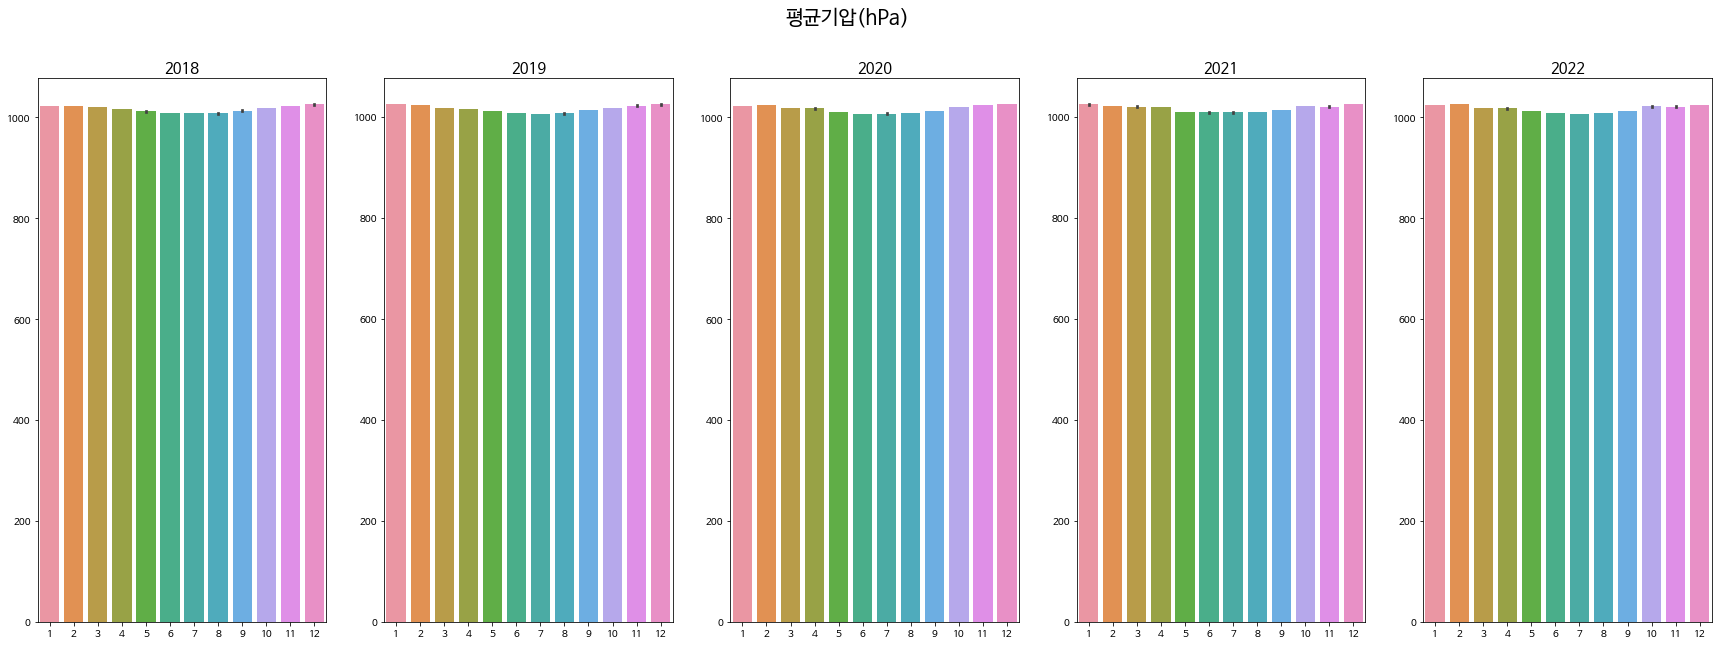

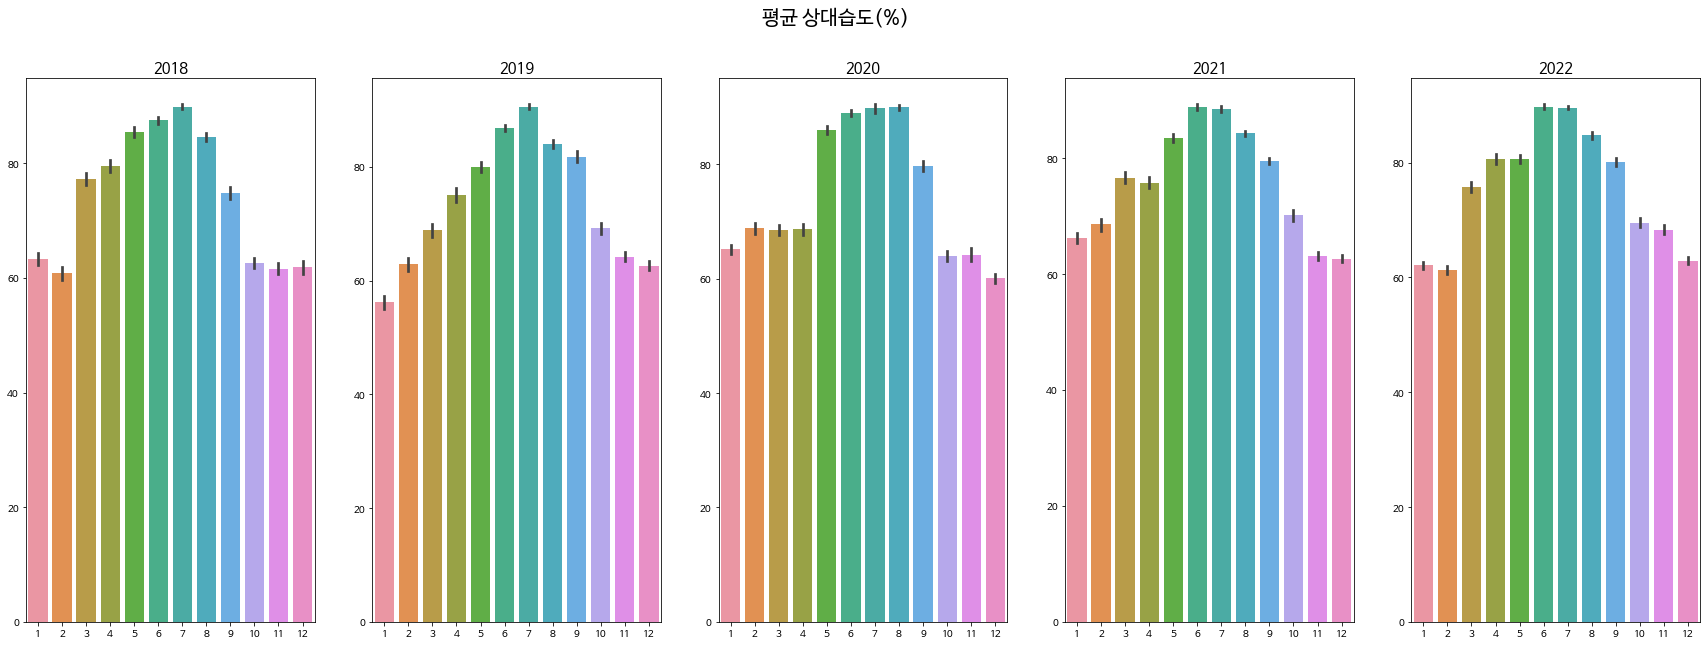

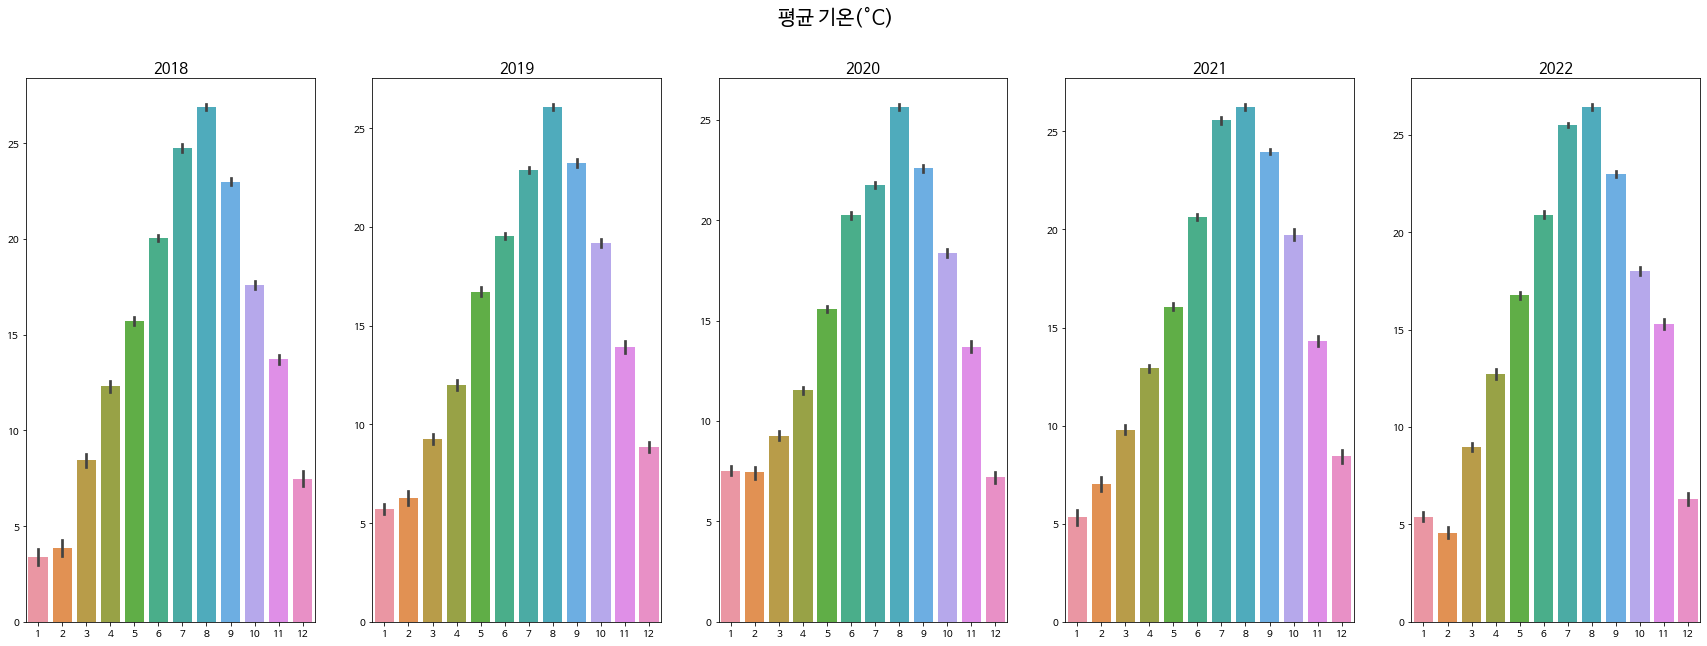

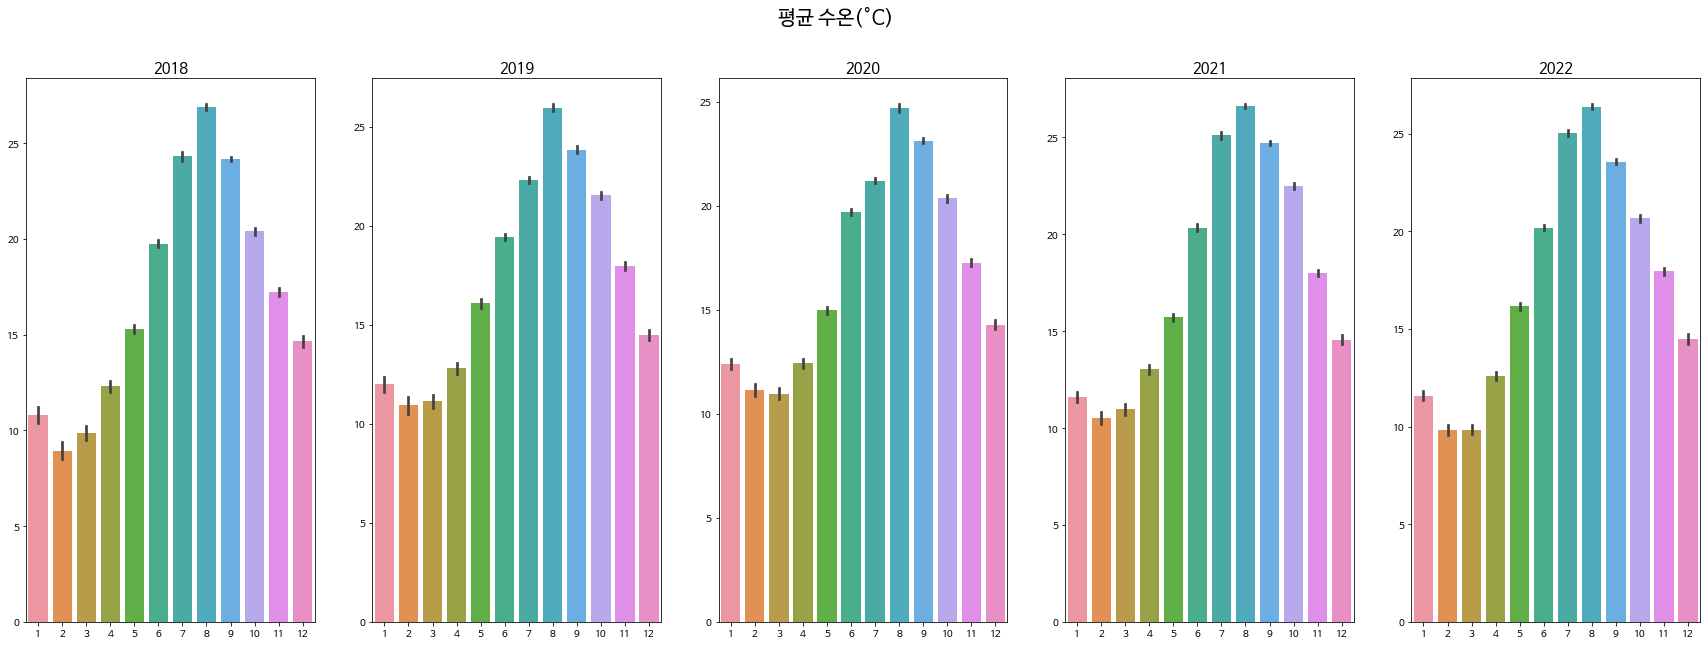

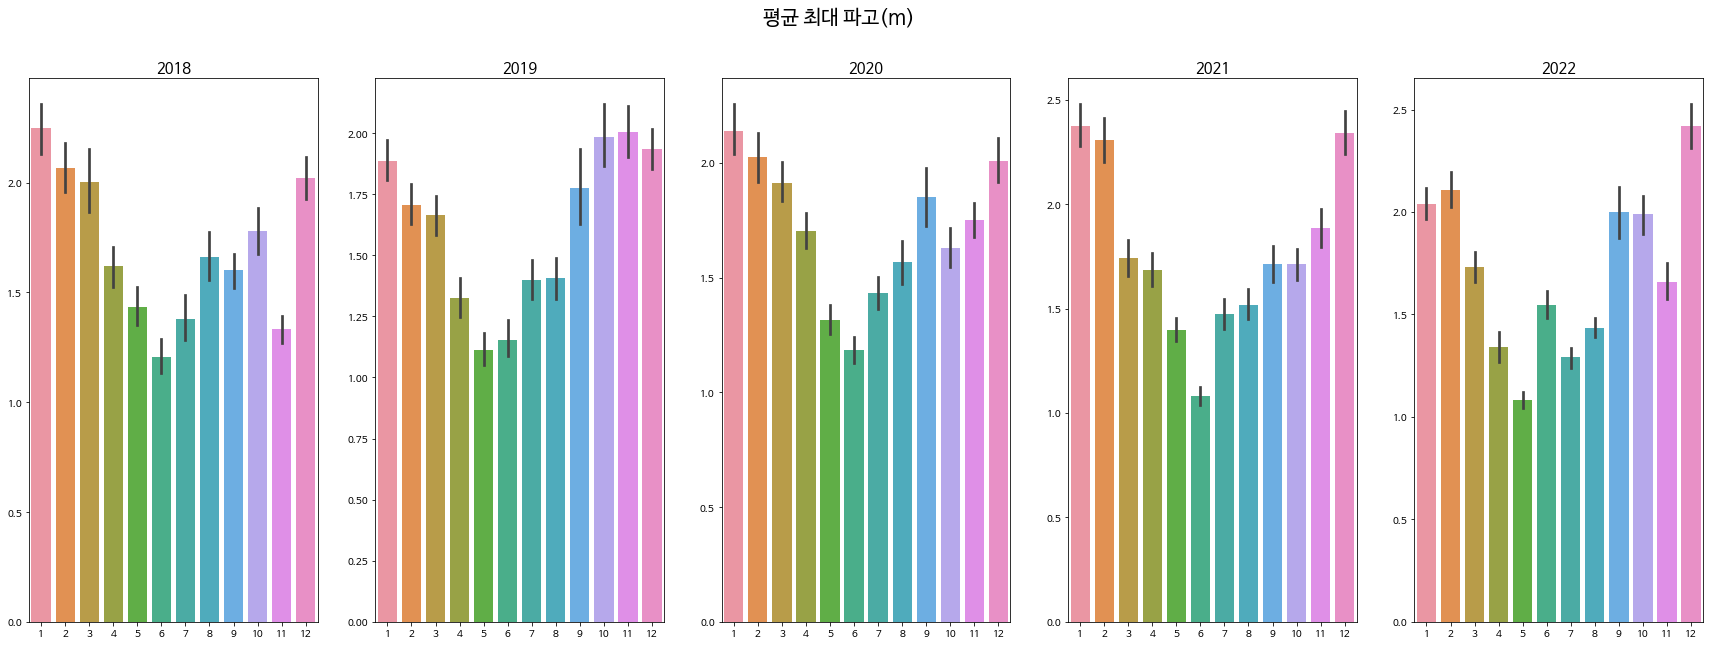

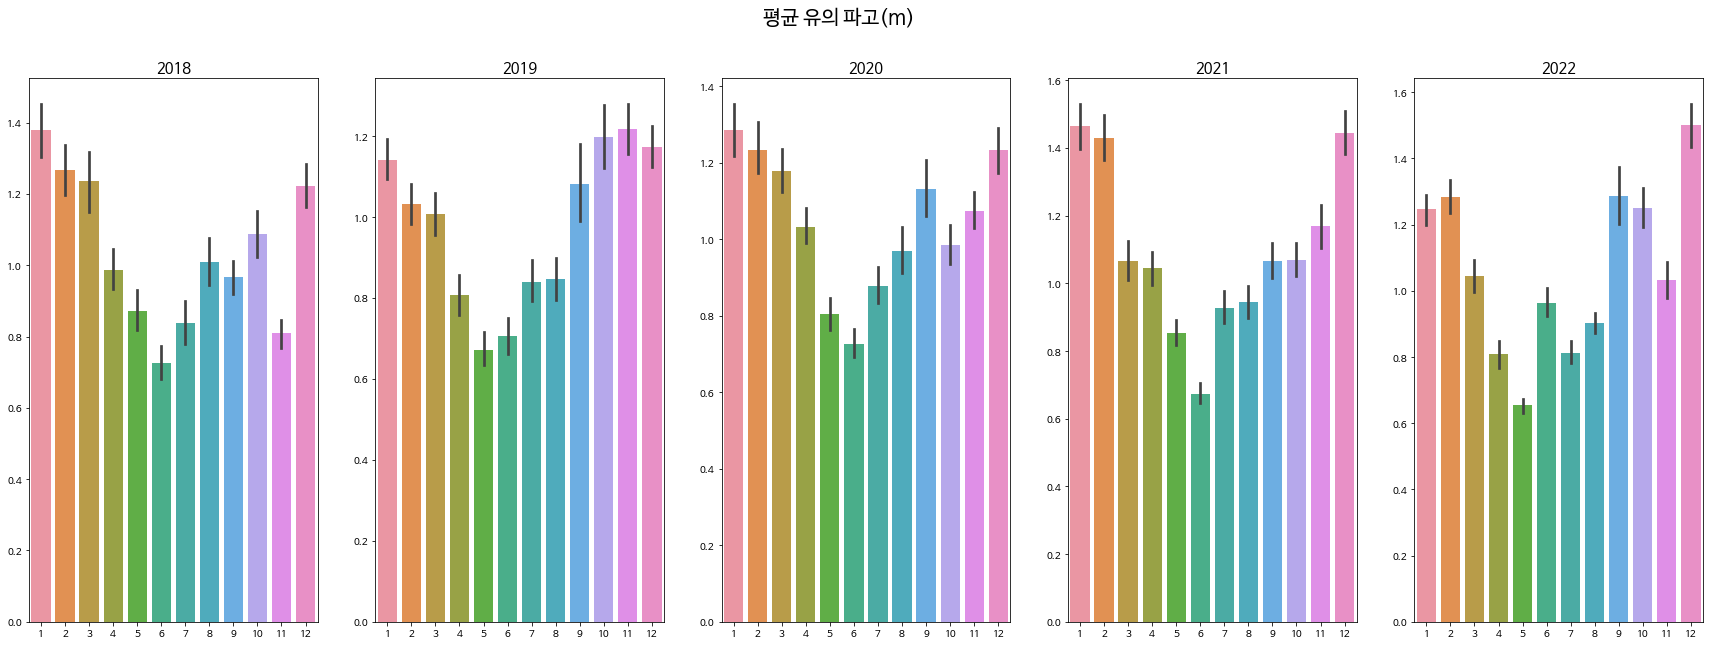

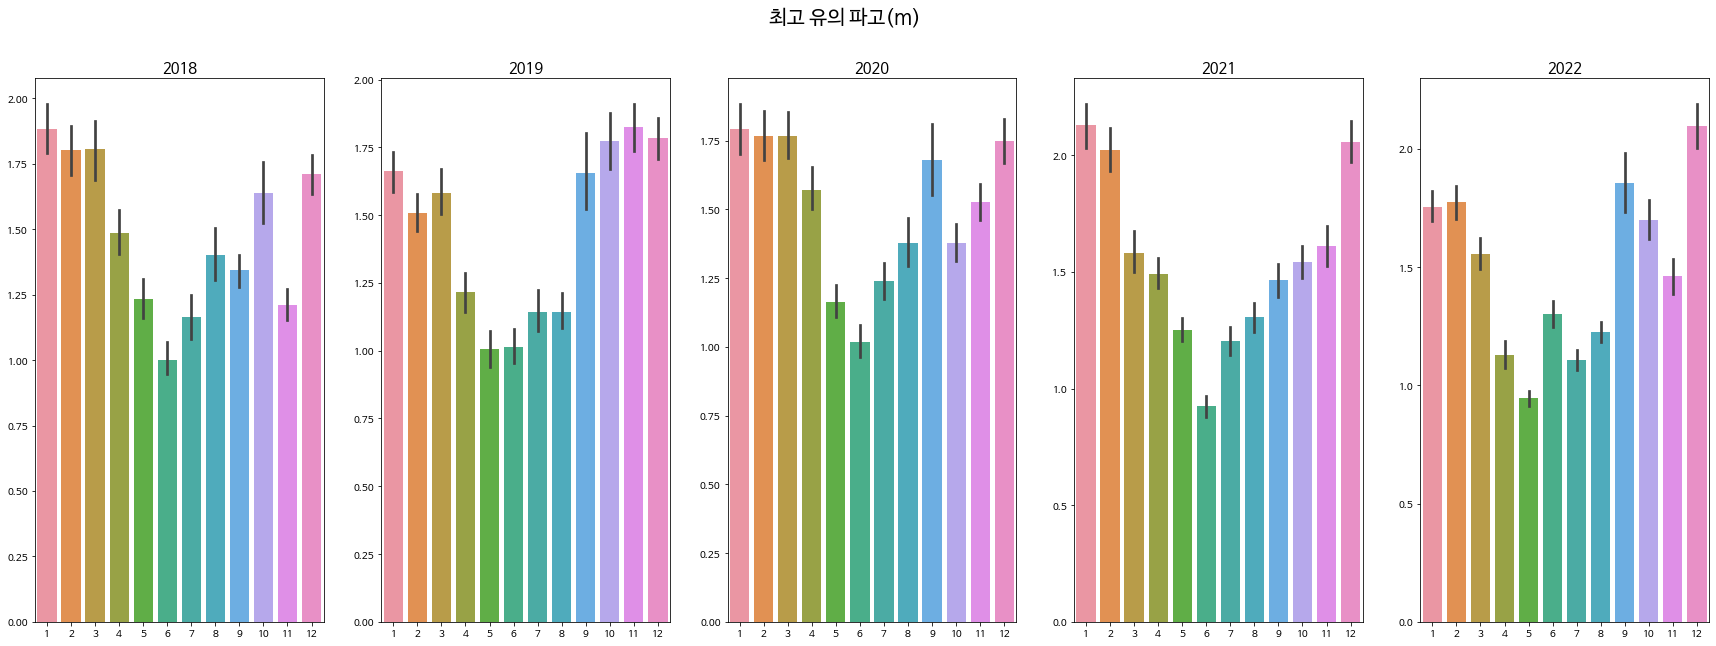

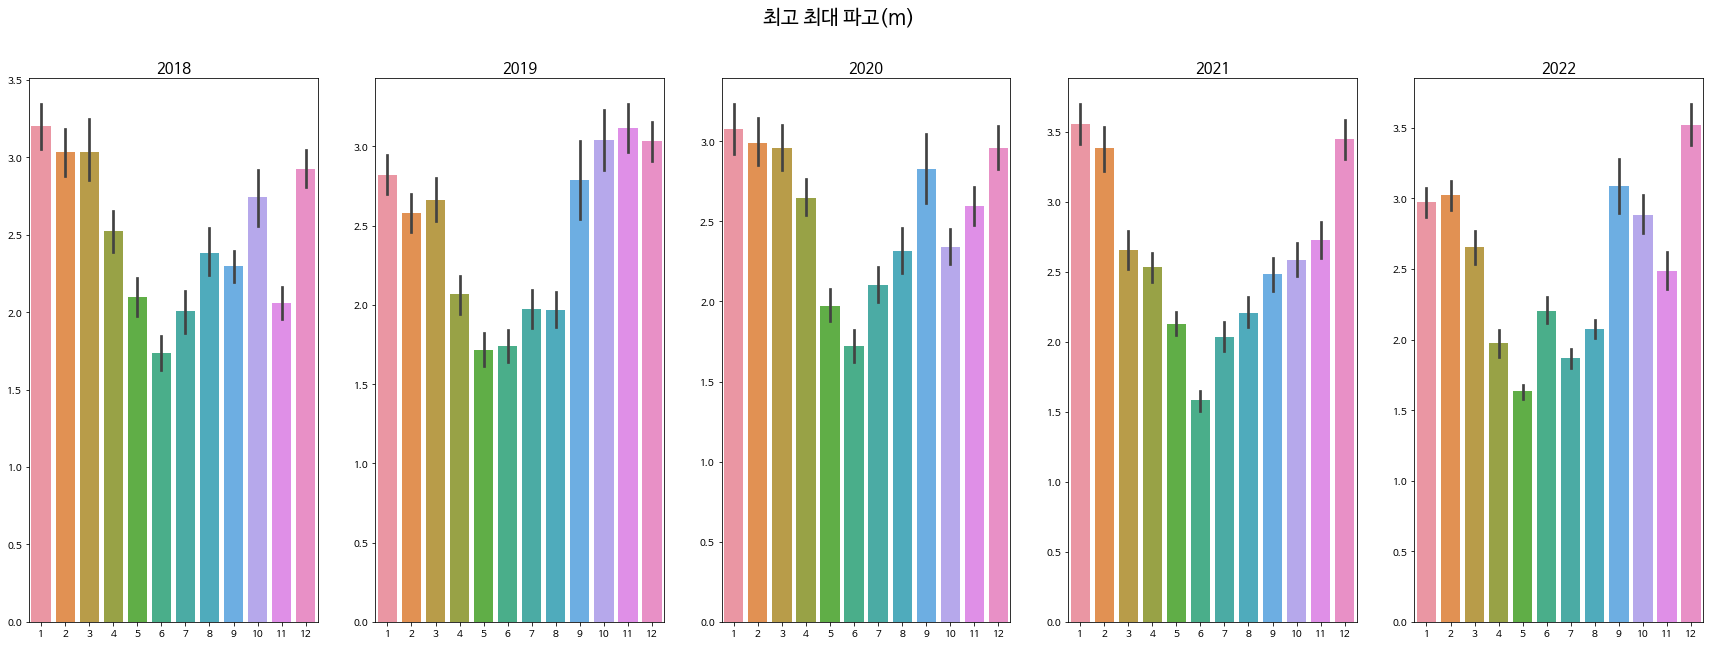

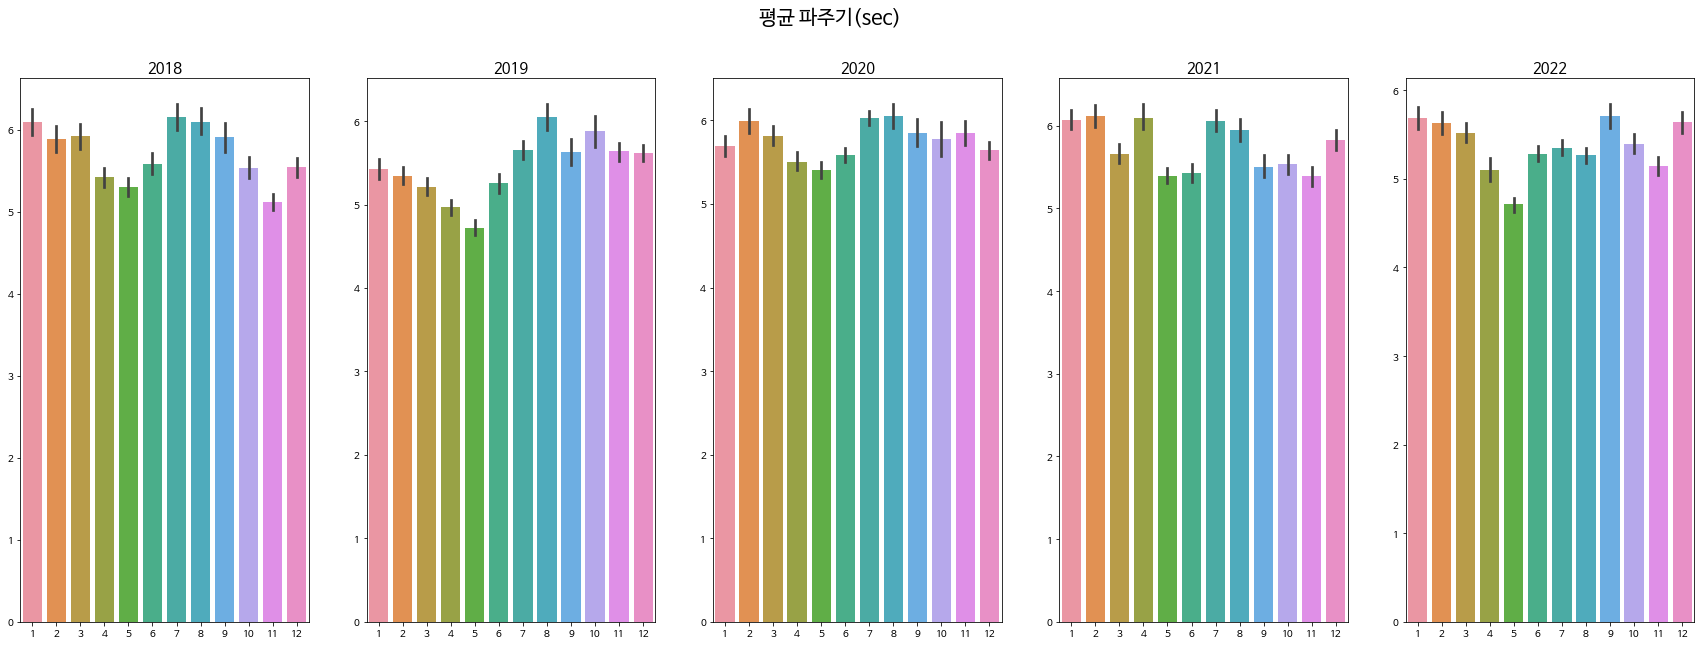

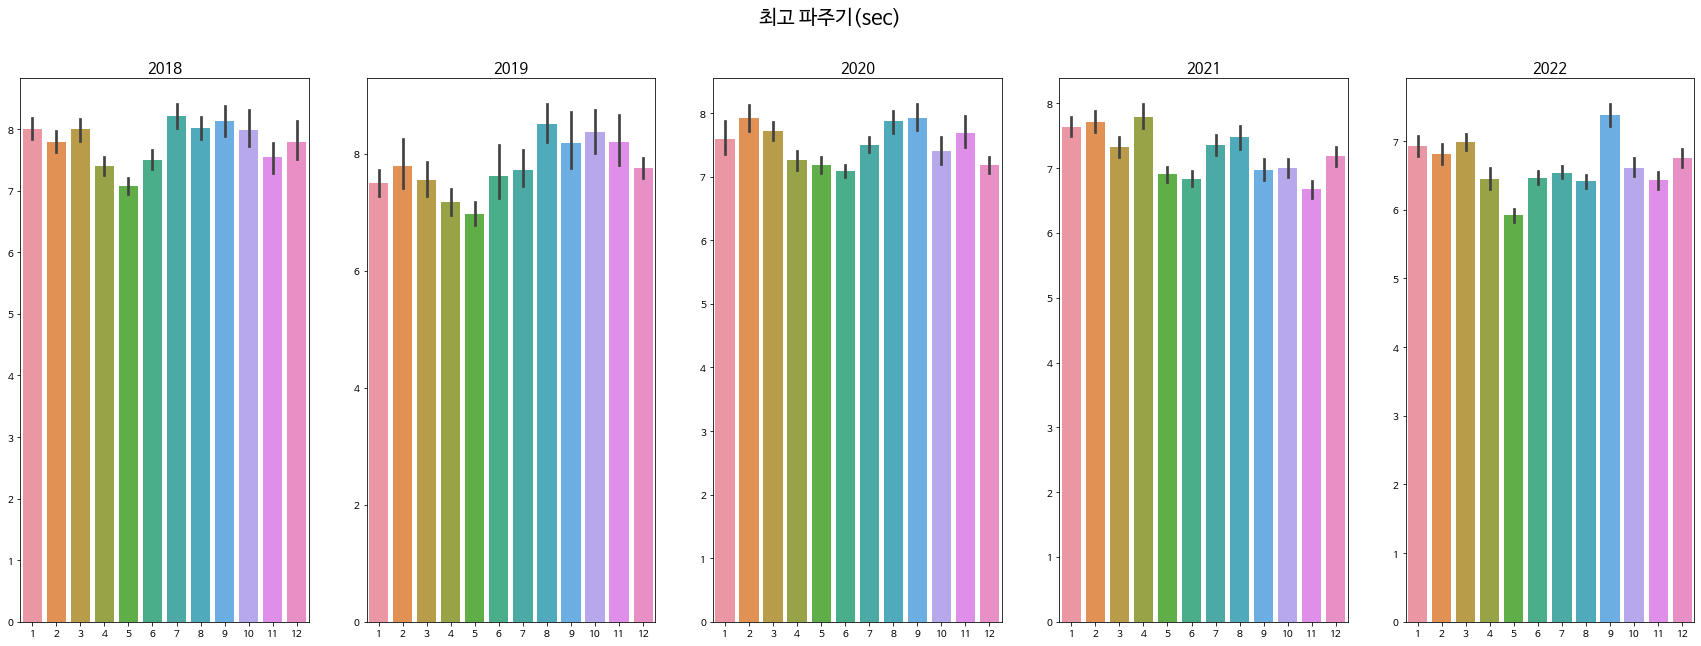

In [ ]:
make_plot(sea_weather)

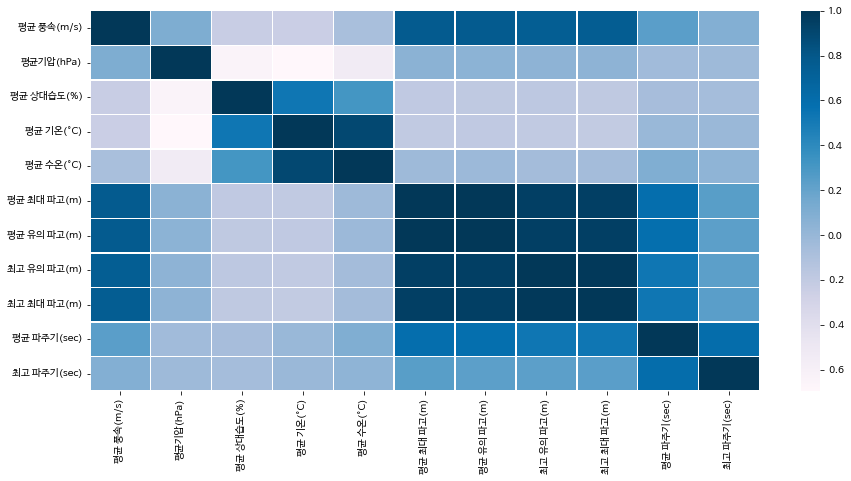

In [ ]:
corr = sea_weather.iloc[:,2:-4].corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr,
            # annot = True, 
            linewidths = 0.4, 
            linecolor = 'white', 
            fmt = '.1f', 
            cmap = plt.cm.PuBu) 

plt.show()